# Generation

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.models import load_model
from tensorflow.keras.utils import plot_model, to_categorical
from sklearn.metrics import classification_report
size = 64

In [2]:
(h, w) = (size, size)
center = (size/2, size/2)

In [3]:
def konhueta(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(-np.pi, np.pi, 200) 
    else:
        t = np.linspace(-np.pi/2, np.pi/2, 200) 
    x = wight + hight*np.cos(t);
    y = wight*np.tan(t) + hight*np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [4]:
def ellipse(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200)
    else:
        t = np.linspace(np.pi, 2*np.pi, 200)
    x = wight * np.cos(t)
    y = hight * np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        clr = np.random.randint(clr_mim, clr_max)
        image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [5]:
def paskal_snail(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200) 
    else:
        t = np.linspace(0, np.pi, 200) 
    x = 2*wight*np.cos(t) - hight*np.cos(2*t)
    y = 2*wight*np.sin(t) - hight* np.sin(2*t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [6]:
def create_figure(figure, noise_level=1, half=False):
    weight, height = np.random.uniform(size_min, size_max), np.random.uniform(size_min, size_max)
    angle = np.random.uniform(angle_min, angle_max)
    image = figure(weight, height, angle, noise_level, half)
    return image

In [7]:
file_name_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_train = open(file_name_train, 'wb')
file_lable_train = open(file_lable_train, 'wb')
train_matrices = []
train_labels = []
for i in range(600):
    size_min, size_max = 10, 30
    angle_min, angle_max = 0, 90
    label = 0 # ellipse
    image = create_figure(ellipse, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 1 # half-ellipse
    image = create_figure(ellipse, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)
       
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 180
    label = 2 # konhoida
    image = create_figure(konhueta, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 3 # half-konhoida
    image = create_figure(konhueta, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)
    
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 90
    label = 4 # snail
    image = create_figure(paskal_snail, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 5 # half-snail
    image = create_figure(paskal_snail, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)

train_matrices = np.array(train_matrices, dtype=np.uint8)
train_labels = np.array(train_labels, dtype=np.uint8)
p = np.random.permutation(train_matrices.shape[0])
train_matrices = train_matrices[p]
train_matrices.tofile(file_train)
train_labels = train_labels[p]
train_labels.tofile(file_lable_train)
file_train.close();
file_lable_train.close();

#Test
file_name_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
file_test = open(file_name_test, 'wb')
file_lable_test = open(file_lable_test, 'wb')
test_matrices = []
test_labels = []
for i in range(100):
    size_min, size_max = 10, 30
    angle_min, angle_max = 0, 90
    label = 0 # ellipse
    image = create_figure(ellipse, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 1 # half-ellipse
    image = create_figure(ellipse, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
       
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 180
    label = 2 # konhoida
    image = create_figure(konhueta, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 3 # half-konhoida
    image = create_figure(konhueta, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
    
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 90
    label = 4 # snail
    image = create_figure(paskal_snail, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 5 # half-snail
    image = create_figure(paskal_snail, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
    
test_matrices = np.array(test_matrices, dtype=np.uint8)
test_labels = np.array(test_labels, dtype=np.uint8)
p = np.random.permutation(test_matrices.shape[0])
test_matrices = test_matrices[p]
test_labels = test_labels[p]
test_matrices.tofile(file_test)
test_labels.tofile(file_lable_test)    
file_test.close()
file_lable_test.close()

In [8]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, imsize * imsize)
    x_test = x_test.reshape(-1, imsize * imsize)
    return x_train, y_train, x_test, y_test

# Modeling

In [9]:
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

## MNIST

In [10]:
num_classes = 10
img_rows = img_cols = 28

In [11]:
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

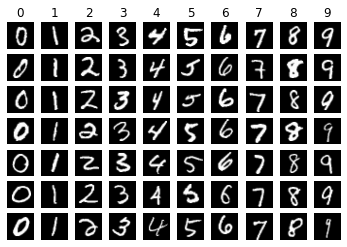

In [12]:
classes = list(np.arange(num_classes))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((x_train[idx]*255).reshape(img_cols, img_cols).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
inp = Input(img_rows * img_cols) # Input layer
x = Dropout(0.3)(inp)
x = Dense(units = 32, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)
model.summary()
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])
plot_model(model, to_file = 'mnist_dense.png')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [15]:
epochs = 20
history = model.fit(x_train, y_train, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_test, y_test))
model.save('mnist/mnist_class.model')

Epoch 1/20
469/469 - 2s - loss: 0.0256 - accuracy: 0.8290 - val_loss: 0.0125 - val_accuracy: 0.9213 - 2s/epoch - 4ms/step
Epoch 2/20
469/469 - 1s - loss: 0.0143 - accuracy: 0.9080 - val_loss: 0.0103 - val_accuracy: 0.9350 - 1s/epoch - 2ms/step
Epoch 3/20
469/469 - 1s - loss: 0.0123 - accuracy: 0.9206 - val_loss: 0.0090 - val_accuracy: 0.9417 - 1s/epoch - 2ms/step
Epoch 4/20
469/469 - 1s - loss: 0.0111 - accuracy: 0.9284 - val_loss: 0.0084 - val_accuracy: 0.9441 - 1s/epoch - 2ms/step
Epoch 5/20
469/469 - 1s - loss: 0.0102 - accuracy: 0.9342 - val_loss: 0.0078 - val_accuracy: 0.9481 - 1s/epoch - 2ms/step
Epoch 6/20
469/469 - 1s - loss: 0.0095 - accuracy: 0.9389 - val_loss: 0.0072 - val_accuracy: 0.9529 - 1s/epoch - 3ms/step
Epoch 7/20
469/469 - 4s - loss: 0.0091 - accuracy: 0.9416 - val_loss: 0.0070 - val_accuracy: 0.9541 - 4s/epoch - 8ms/step
Epoch 8/20
469/469 - 1s - loss: 0.0086 - accuracy: 0.9446 - val_loss: 0.0066 - val_accuracy: 0.9576 - 1s/epoch - 3ms/step
Epoch 9/20
469/469 - 1s 

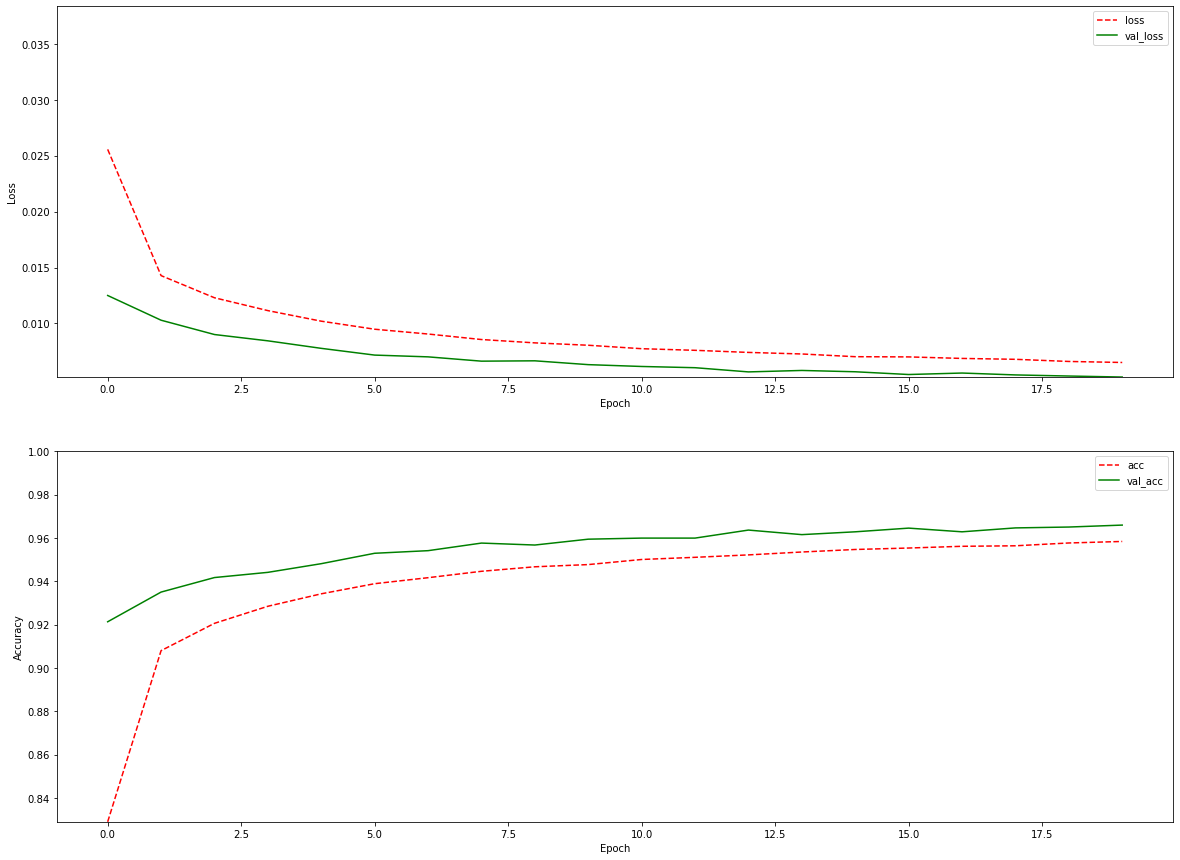

In [16]:
one_plot(history.history['loss'], history.history['val_loss'],
         history.history['accuracy'], history.history['val_accuracy'])

In [19]:
model = load_model('mnist/mnist_class.model/')

In [33]:
y_pred = model.predict(x_test.reshape(-1,img_cols*img_rows))
predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
true_labels = np.array([np.argmax(x) for x in y_test], dtype = np.int32)

313/313 [==============================] - 1s 1ms/step


In [34]:
print(classification_report(true_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.9585    0.9908    0.9744       980
           1     0.9867    0.9833    0.9850      1135
           2     0.9640    0.9603    0.9621      1032
           3     0.9546    0.9584    0.9565      1010
           4     0.9753    0.9654    0.9703       982
           5     0.9883    0.9473    0.9674       892
           6     0.9727    0.9687    0.9707       958
           7     0.9679    0.9669    0.9674      1028
           8     0.9270    0.9651    0.9457       974
           9     0.9657    0.9495    0.9575      1009

    accuracy                         0.9659     10000
   macro avg     0.9661    0.9656    0.9657     10000
weighted avg     0.9662    0.9659    0.9659     10000



## My Graphics

In [37]:
num_classes = 6
img_rows = img_cols = 64

In [38]:
file_image_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_image_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

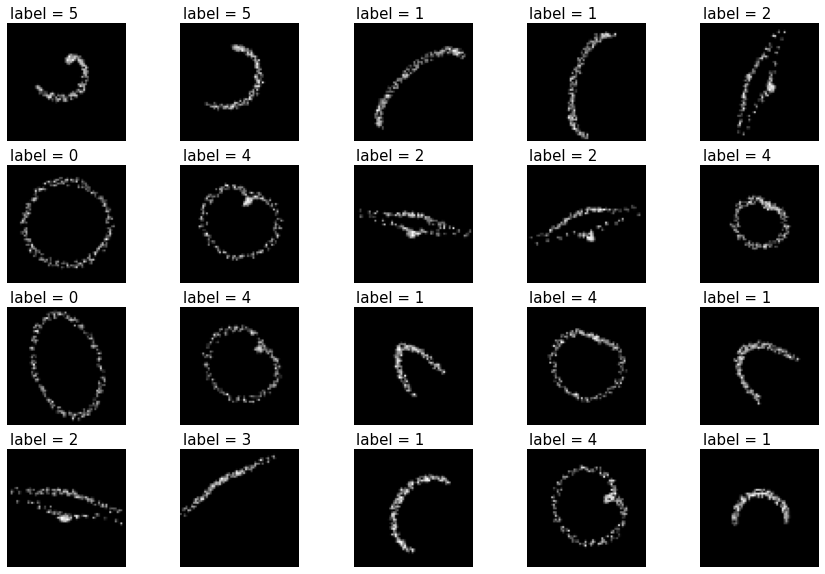

In [39]:
fig, ax = plt.subplots(4,5, figsize=(15,10))
for i in range(4):
    for j in range(5):
        ax[i][j].imshow(x_train[i*5+j].reshape(img_rows, img_cols), cmap = 'gray')
        ax[i][j].axis('off')
        ax[i][j].text(1, -3, f'label = {y_train[i*5+j]}', size=15)

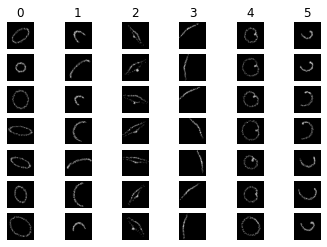

In [40]:
classes = list(np.arange(num_classes))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((x_train[idx]*255).reshape(img_cols, img_cols).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [41]:
inp = Input(img_rows * img_cols) # Input layer
x = Dropout(0.3)(inp)
x = Dense(units = 32, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)
model.summary()
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])
plot_model(model, to_file = 'mnist_dense.png')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                131104    
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 131,302
Trainable params: 131,302
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [42]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [43]:
epochs = 20
history = model.fit(x_train, y_train, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_test, y_test))
model.save('6_class.model')

Epoch 1/20
29/29 - 1s - loss: 0.1208 - accuracy: 0.6744 - val_loss: 0.0933 - val_accuracy: 0.7867 - 584ms/epoch - 20ms/step
Epoch 2/20
29/29 - 0s - loss: 0.0734 - accuracy: 0.8256 - val_loss: 0.0558 - val_accuracy: 0.8333 - 216ms/epoch - 7ms/step
Epoch 3/20
29/29 - 0s - loss: 0.0455 - accuracy: 0.8672 - val_loss: 0.0396 - val_accuracy: 0.8700 - 212ms/epoch - 7ms/step
Epoch 4/20
29/29 - 0s - loss: 0.0326 - accuracy: 0.9014 - val_loss: 0.0307 - val_accuracy: 0.8900 - 209ms/epoch - 7ms/step
Epoch 5/20
29/29 - 0s - loss: 0.0248 - accuracy: 0.9336 - val_loss: 0.0251 - val_accuracy: 0.9183 - 217ms/epoch - 7ms/step
Epoch 6/20
29/29 - 0s - loss: 0.0192 - accuracy: 0.9519 - val_loss: 0.0208 - val_accuracy: 0.9317 - 224ms/epoch - 8ms/step
Epoch 7/20
29/29 - 0s - loss: 0.0152 - accuracy: 0.9689 - val_loss: 0.0175 - val_accuracy: 0.9550 - 204ms/epoch - 7ms/step
Epoch 8/20
29/29 - 0s - loss: 0.0123 - accuracy: 0.9747 - val_loss: 0.0147 - val_accuracy: 0.9583 - 216ms/epoch - 7ms/step
Epoch 9/20
29/2

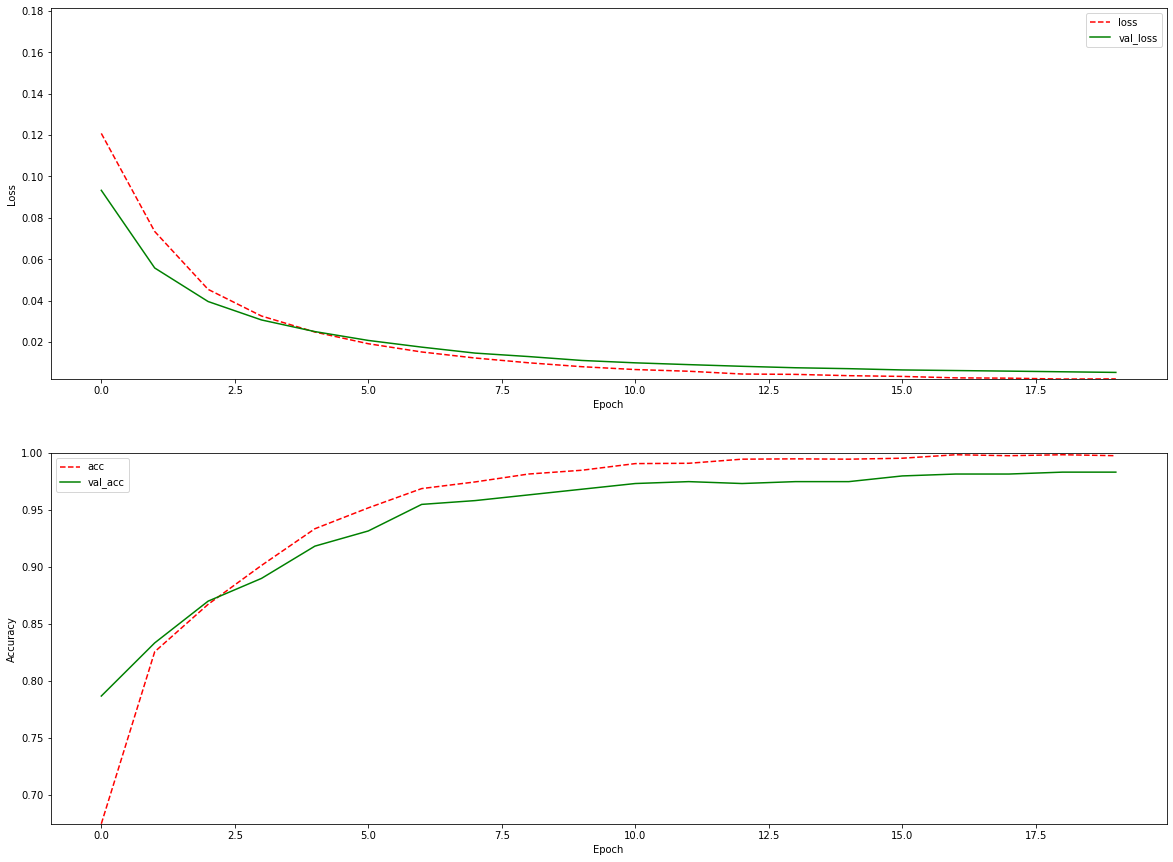

In [44]:
one_plot(history.history['loss'], history.history['val_loss'],
         history.history['accuracy'], history.history['val_accuracy'])

In [45]:
model = load_model('6_class.model')

In [46]:
y_pred = model.predict(x_test.reshape(-1,img_cols*img_rows))
predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
true_labels = np.array([np.argmax(x) for x in y_test], dtype = np.int32)

19/19 [==============================] - 0s 1ms/step


In [51]:
print(classification_report(true_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.9703    0.9800    0.9751       100
           1     1.0000    0.9600    0.9796       100
           2     0.9900    0.9900    0.9900       100
           3     0.9615    1.0000    0.9804       100
           4     0.9898    0.9700    0.9798       100
           5     0.9901    1.0000    0.9950       100

    accuracy                         0.9833       600
   macro avg     0.9836    0.9833    0.9833       600
weighted avg     0.9836    0.9833    0.9833       600



In [26]:
y_pred = model.predict(test_matrices.reshape(-1,img_cols*img_rows))
predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
n_of_labels = len(predicted_labels)
test_labels_1 = np.where(y_test.reshape((100*6, 6)) == 1)[1]
n_of_true_labels = predicted_labels[predicted_labels == test_labels_1].shape[0]

classes_true_distribution = [[i, predicted_labels[(predicted_labels == test_labels_1) & (predicted_labels == i)].shape[0]] 
                             for i in range(num_classes)]
classes_error_with = {
    i: predicted_labels[(predicted_labels != test_labels_1) & (test_labels_1 == i)]
    for i in range(num_classes)
}
classes_error_with

19/19 [==============================] - 0s 3ms/step


{0: array([], dtype=int32),
 1: array([], dtype=int32),
 2: array([], dtype=int32),
 3: array([1, 0, 0, 1]),
 4: array([0, 0]),
 5: array([0])}

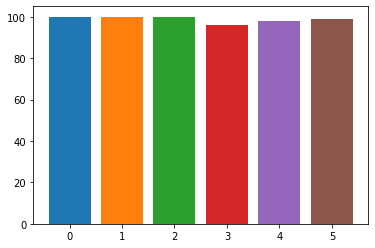

In [27]:
for x, num in classes_true_distribution:
    plt.bar(x, num)

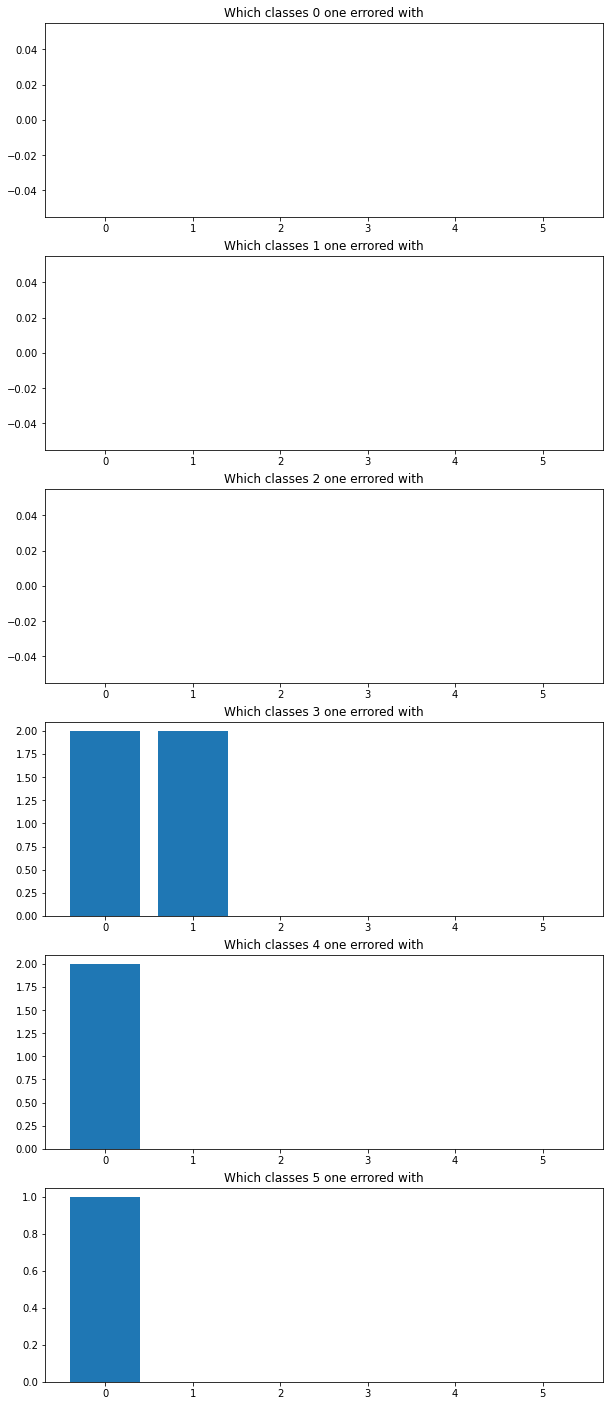

In [28]:
fig, ax = plt.subplots(num_classes, 1, figsize=(10,25))
for i, num in enumerate(classes_error_with.values()):
    ax[i].bar([x for x in range(num_classes)], [num[num == x].shape[0] for x in range(num_classes)])
    ax[i].set_title(f'Which classes {i} one errored with')

# Using Some Sklearn models

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost 
from catboost import CatBoostClassifier

KNN

In [35]:
model = 
grid = {'n_neighbors' : [x for x in np.arange(1, 5)]}
gscv = GridSearchCV(estimator = KNeighborsClassifier(), model, grid)
gscv.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4]})

In [36]:
gscv.best_params_

{'n_neighbors': 1}

In [42]:
model = KNeighborsClassifier(**gscv.best_params_)
model.fit(x_train, y_train)
model.predict(x_test)
accuracy_score(y_test, model.predict(x_test))

0.9816666666666667

Random Forest

In [48]:
grid = { 
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4],
    'criterion' :['gini', 'entropy'],
}
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, scoring='accuracy', n_jobs=-1, verbose=10)
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=10)

In [49]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [50]:
model = RandomForestClassifier(**gscv.best_params_)
model.fit(x_train, y_train)
model.predict(x_test)
accuracy_score(y_test, model.predict(x_test))

0.33166666666666667

XBoost

In [53]:
model = xgboost.XGBClassifier()
model.fit(x_train, y_train)
model.predict(x_test)
accuracy_score(y_test, model.predict(x_test))

0.95